In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2024-12-31'

stock = 'GOOG'

In [ ]:
data = yf.download(stock, start, end)

/tmp/ipython-input-3914557521.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


we took past 12 years of stock prices data

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.460485,16.528267,16.137910,16.152011,147611217
1,2012-01-04,16.531483,16.580216,16.341995,16.451087,114989399
2,2012-01-05,16.302168,16.424865,16.233398,16.379349,131808205
3,2012-01-06,16.079779,16.326657,16.074088,16.305629,108119746
4,2012-01-09,15.398018,16.005074,15.367590,15.992703,233776981
...,...,...,...,...,...,...
3264,2024-12-23,195.357330,195.855716,191.011404,193.403651,15235900
3265,2024-12-24,196.932251,197.031919,194.567899,195.536761,6809800
3266,2024-12-26,196.463760,197.520336,195.237720,196.104922,7907900


In [ ]:
data.columns.tolist()

[('Date', ''),
 ('Close', 'GOOG'),
 ('High', 'GOOG'),
 ('Low', 'GOOG'),
 ('Open', 'GOOG'),
 ('Volume', 'GOOG')]

In [ ]:
if isinstance(data.columns, pd.MultiIndex):
  data.columns = [col[0] for col in data.columns]

In [ ]:
data

,Date,Close,High,Low,Open,Volume
0,2012-01-03,16.460485,16.528267,16.137910,16.152011,147611217
1,2012-01-04,16.531483,16.580216,16.341995,16.451087,114989399
2,2012-01-05,16.302168,16.424865,16.233398,16.379349,131808205
3,2012-01-06,16.079779,16.326657,16.074088,16.305629,108119746
4,2012-01-09,15.398018,16.005074,15.367590,15.992703,233776981
...,...,...,...,...,...,...
3264,2024-12-23,195.357330,195.855716,191.011404,193.403651,15235900
3265,2024-12-24,196.932251,197.031919,194.567899,195.536761,6809800
3266,2024-12-26,196.463760,197.520336,195.237720,196.104922,7907900
3267,2024-12-27,193.413620,196.164720,191.352302,195.835784,14693000


In [ ]:
moving_average_100_days = data.Close.rolling(100).mean()

the rolling average works by sliding a 'window' of size = 100 across the data.

so, each MA(moving average) value is the average of the current point and the 99 points before it.

we do this for all 3,000 points, sliding the window forward one row at a time.

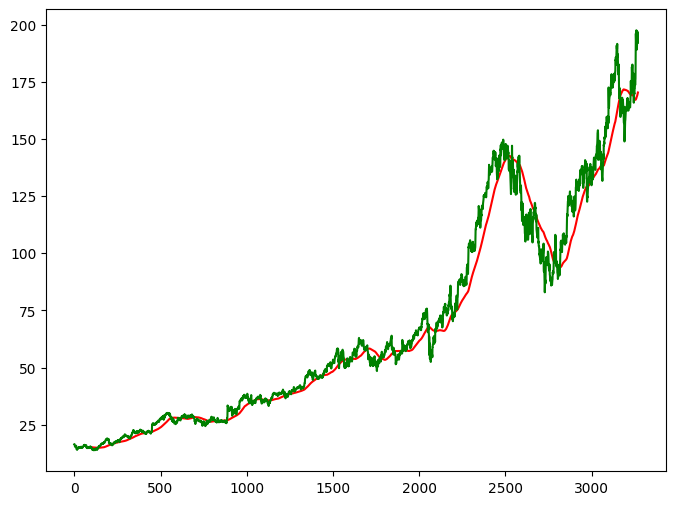

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(moving_average_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
moving_average_200_days = data.Close.rolling(200).mean()

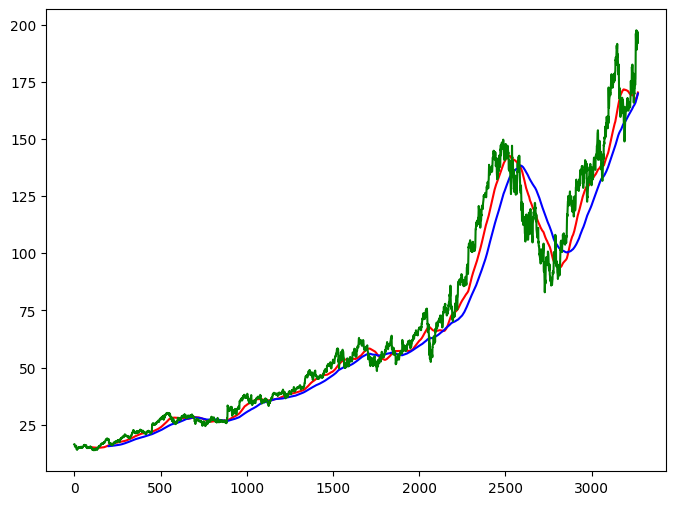

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(moving_average_100_days, 'r')
plt.plot(moving_average_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
data_train = pd.DataFrame(data.Close[0 : int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80) : len(data)])

In [ ]:
data_train

,Close
0,16.460485
1,16.531483
2,16.302168
3,16.079779
4,15.398018
...,...
2610,115.908302
2611,111.637039
2612,109.992783
2613,108.570030


In [ ]:
data_test

,Close
2615,105.206055
2616,105.120140
2617,107.559944
2618,112.032333
2619,113.263916
...,...
3264,195.357330
3265,196.932251
3266,196.463760
3267,193.413620


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
data_train_scaled = scaler.fit_transform(data_train)

In [ ]:
data_test_scaled = scaler.transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_train_scaled.shape[0]):
  x.append(data_train_scaled[i - 100 : i])
  y.append(data_train_scaled[i, 0])

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
x = np.array(x) # converts list to array if needed
# just to make sure x is a NumPy array
y = np.array(y)

gradually reducing LSTM units mimics and encoder strcuture -> focuses model attention

In [ ]:
model = Sequential()

model.add(LSTM(units = 128, return_sequences=True, input_shape = (x.shape[1], 1))) # input_shape is (sequence_length, features)
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=32))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
# fully connected layer
# units = 1, predict one value(e.g., next day's stock price)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
x.shape, y.shape

((2515, 100, 1), (2515,))

In [ ]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0228
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0022
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0022
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0017
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012
Epoc

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385,253 (1.47 MB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256,836 (1003.27 KB)

In [ ]:
pass_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pass_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scaled = scaler.transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scaled.shape[0]):
  x.append(data_test_scaled[i - 100 : i])
  y.append(data_test_scaled[i, 0])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
y_pred = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [ ]:
scale = 1 / scaler.scale_

In [ ]:
y_pred = y_pred * scale

In [ ]:
y = y * scale

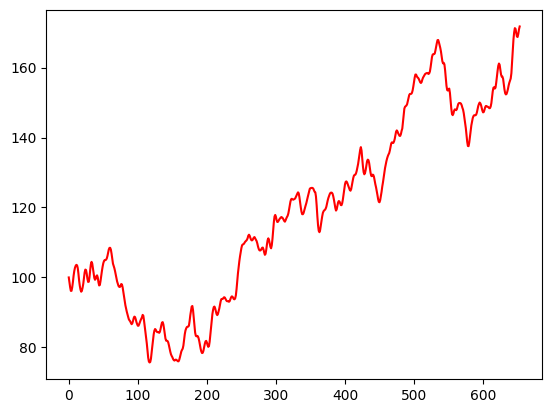

In [ ]:
plt.plot(y_pred, 'r', label='predicted price')

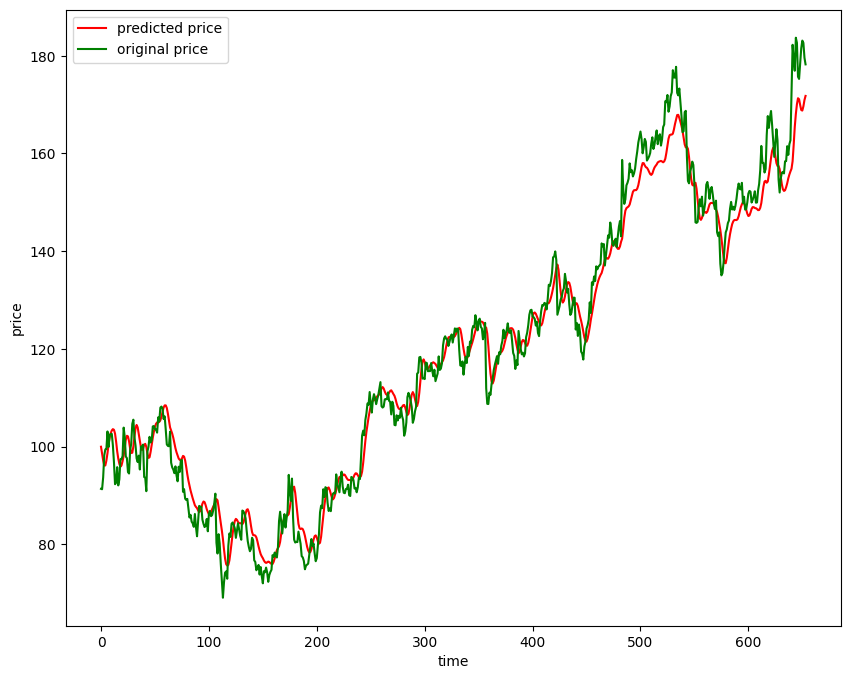

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(y_pred, 'r', label='predicted price')
plt.plot(y, 'g', label='original price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
model.save('stock_predictions_model.keras')